### Importing the Libraries

In [1]:
import numpy as np  # For using n-d array mathematical operations
import pandas as pd # For open csv files and create dataframe
import matplotlib.pyplot as plt # For plotting graphs

### Reading CSV Files and Checking the content in it

In [2]:
# Opening csv files
dataset = pd.read_csv('startup_funding.csv', skipinitialspace = True, encoding = 'utf-8')
df = dataset.copy() # Copying the dataset dataframe in df in case anything goes wrong, we can start again
df.head(10) # Showing first 10 rows in df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
6,6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000",NaN
7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000",NaN
8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000",NaN
9,9,05/07/2017,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,"12,000,000",NaN


### Solution for given problem
To find top 10 cities with maximum fundings we can use columns CityLocation and AmountInUSD in the dataset.
Count each city in the column.

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


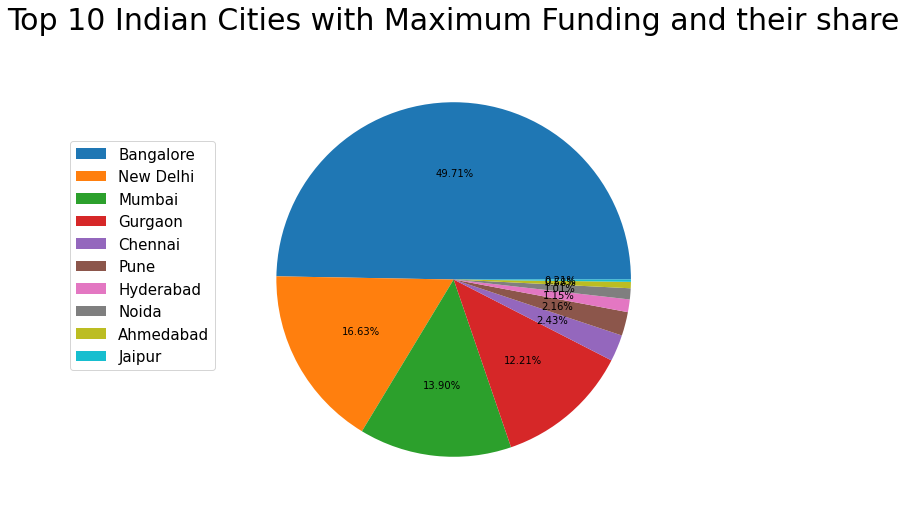

In [4]:
# Replacing all the values having nan with 0 in the column AmountInUSD
df.AmountInUSD.replace(np.nan,'0',inplace = True)
# Removing nan from CityLocation
df.CityLocation.replace(np.nan, '', inplace = True)
df.CityLocation.replace('bangalore', 'Bangalore', inplace = True)
df.CityLocation.replace('Delhi', 'New Delhi', inplace = True)

cityLocation = df['CityLocation'] # Copying column CityLocation in df
amountInUSD = df['AmountInUSD'] # Copying column AmountInUSD in df

cityWithAmount = {} # Creating a dictionary which will contain city as key and amount as value
for index in range(len(cityLocation)):
    # One row can contain multiple cities we have to consider first one only
    city = cityLocation[index].split('/')[0]
    amount = str(amountInUSD[index]).replace(',','')
    if city != '':
        # Adding amount to the corresponding city
        if city[-1] == ' ':
            city = city[:-1]
        cityWithAmount[city] = cityWithAmount.get(city,0) + int(amount)

allCities = list(cityWithAmount.keys()) # Getting each city from cityWithAmount
amount = list(cityWithAmount.values()) # Getting amount for each city from cityWithAmount

# Zip function in python converts two 1d arrays into a single 2d array.
# For eg: if a = [1,2,3], b = [4,5,6]
# Then zip(a,b) = [(1,4),[2,5],[3,6]]
cityWithAmount = list(zip(allCities,amount))

# Sorting the list as per amount in descending order
cityWithAmount.sort(reverse = True, key = lambda a : a[1])
cityWithAmount = np.array(cityWithAmount) # Converting into numpy 2D array

city = cityWithAmount[:,0] # Seperating out city from sorted
amount = np.array(cityWithAmount[:,1], dtype = int) # Seperating amount corresponding to the array
totalamount = np.sum(amount[:10]) # Calculating the sum for first 10 rows in amount for totalamount

# Printing top 10 cities with maximum fundings
for index in range(10):
    perc = amount[index]/totalamount*100
    print(city[index],'{:.2f}'.format(perc))

# Plotting the Pie Char
plt.figure(figsize = (7,9))
plt.pie(amount[:10], autopct = '%.2f%%')
plt.axis('equal')
plt.title('Top 10 Indian Cities with Maximum Funding and their share', fontsize = 30)
plt.legend(labels = city[:10], loc = 'upper left', fontsize = 15, bbox_to_anchor = (-0.5,0.8))
plt.show()